In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("kaggle_survey_2020_responses.csv",skiprows = 1)

In [3]:
df.head()

,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Weights & Biases","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Trains","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
0,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1) How many years of experience most people have ?

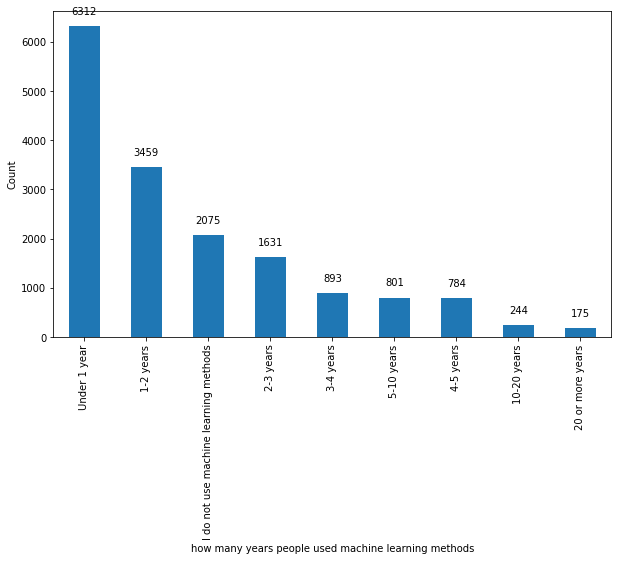

In [4]:
ax=df["For how many years have you used machine learning methods?"].value_counts().plot(kind='bar',figsize=(10,6))
plt.ylabel('Count')
ax.set_xlabel('how many years people used machine learning methods')
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x()+i.get_width()/2,i.get_height()+300), ha='center', va='center')

### 2) Which gender dominates data science industry ?

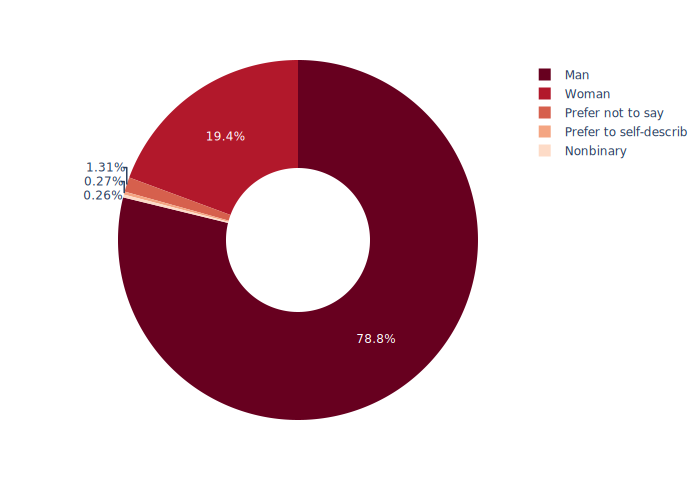

In [5]:
import plotly.io as pio
pio.renderers.default = "browser"
y = df["What is your gender? - Selected Choice"].value_counts()
y_values = []
y_gender = []
for i in range(len(y)):
    n = y[i]
    y_values.append(n)
    y_gender.append(y[y==n].index[0])
plot = px.pie( values = y_values, names = y_gender, color_discrete_sequence=px.colors.sequential.RdBu, hole=0.4)
plot.show(renderer="svg")


### 3)Which language is Popular among Data scientists ?

In [6]:
m=df.groupby("What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python")["What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python"].count()

for i in range(8,20):
    name=df.columns[i]
    m=m.append(df.groupby(name)[name].count())

name="What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice"
n=df.groupby(name)[name].count()

new=pd.concat([m, n], axis=1)
new=new.rename_axis("lang")

new=new.rename(columns={"What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice": "recomended"})

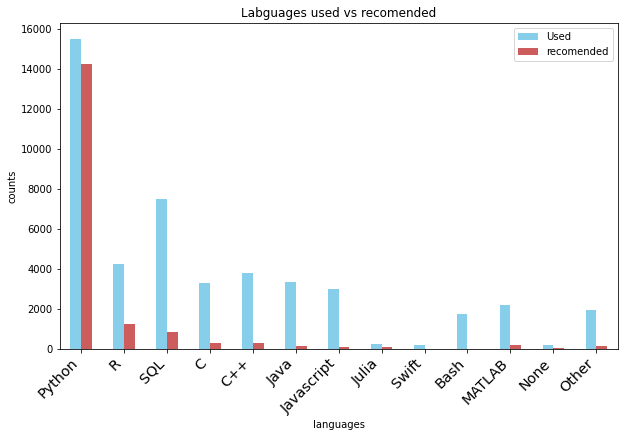

In [7]:
yesSeries =new[0]
nodSeries = new['recomended']

newdf = pd.DataFrame({"Used":yesSeries,"recomended":nodSeries})
ax = newdf.plot.bar(color=["SkyBlue","IndianRed"], rot=0, title="Labguages used vs recomended",figsize=(10,6))
ax.set_xlabel("languages")
ax.set_ylabel("counts")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

### 4) What are the Buzzwords in Data Science ?

In [8]:
dwc=m
dwc=dwc.drop(dwc.index[-2:])
for i in [*range(21,31), *range(33,45), *range(53,63),*range(66,80),*range(82,92)]:
    name=df.columns[i]
    dwc=dwc.append(df.groupby(name)[name].count())

In [9]:
data=dwc.to_dict()

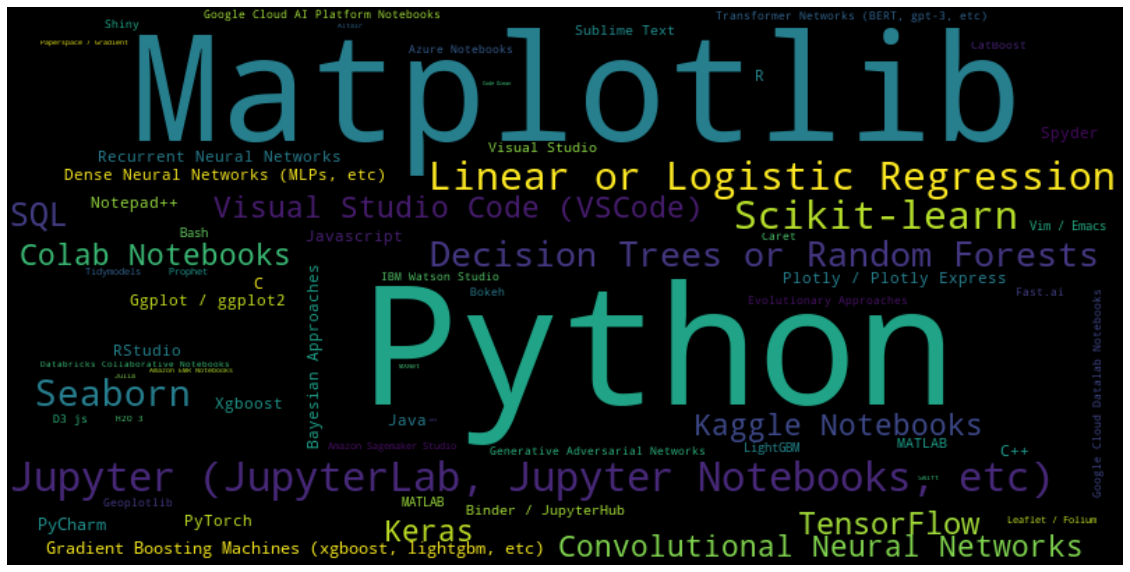

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(data)

plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### 5) Where do most of the people deploy their data analysis or machine learning applications?

In [11]:
name=df.columns[221]
deploy=df.groupby(name)[name].count()
deploy

for i in range(222,229):
    name=df.columns[i]
    deploy=deploy.append(df.groupby(name)[name].count())

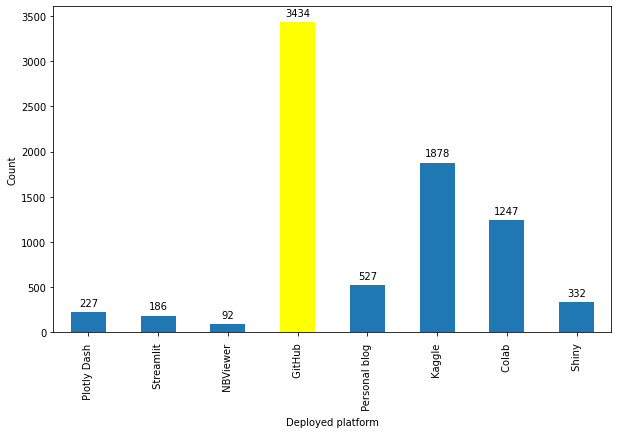

In [12]:
ax =deploy.plot(kind="bar",figsize=(10,6))
plt.ylabel('Count')
ax.set_xlabel('Deployed platform')
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x()+i.get_width()/2,i.get_height()+100), ha='center', va='center')
    
ax.patches[3].set_facecolor('yellow')

### 6)What is age of most people? 

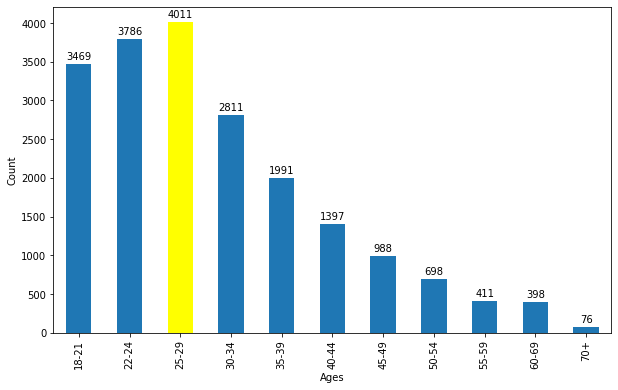

In [13]:
name=df.columns[1]
age=df.groupby(name)[name].count()

ax =age.plot(kind="bar",figsize=(10,6))
plt.ylabel('Count')
ax.set_xlabel('Ages')
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x()+i.get_width()/2,i.get_height()+100), ha='center', va='center')
    
ax.patches[2].set_facecolor('yellow')

In [14]:
role=df["Select the title most similar to your current role (or most recent title if retired): - Selected Choice"].value_counts().to_frame(name="Count")
role.reset_index(level=0, inplace=True)

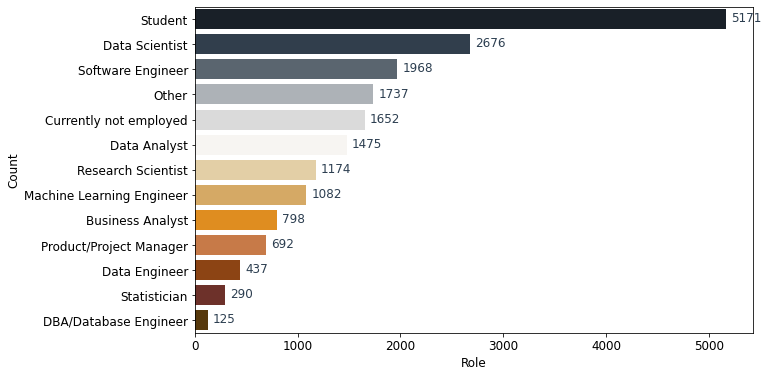

In [15]:
palette=np.array(["#17202A", "#2C3E50", "#566573", "#ABB2B9", "#DADADA", "#F8F5F1", "#EDD39C", "#E8AD52", "#FF9200", "#DC7633", "#A04000", "#78281F", "#633C00"])
plt.figure(figsize=(10, 6))
bar=sns.barplot(x="Count", y="index", palette=palette, data=role)
plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel("Role", size=12)
plt.ylabel("Count", size=12);

for index, b in enumerate(bar.patches):
    bar.text(b.get_width()+50, b.get_y()+0.5, role["Count"][index], color=palette[1], size=12)

### 7) Where are the most people from?

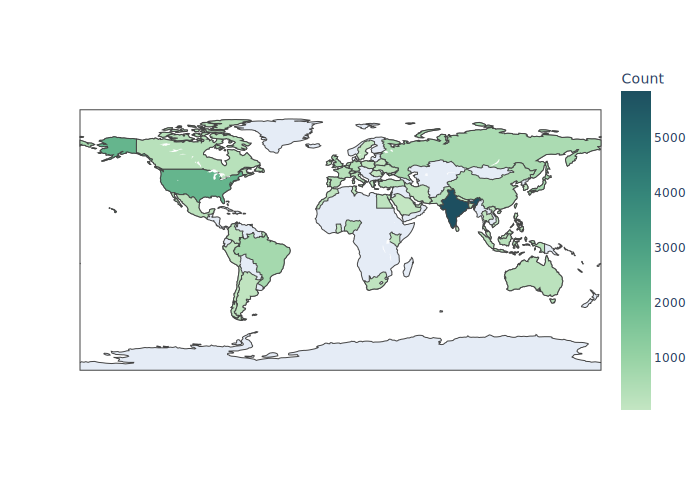

In [16]:
name=df.columns[3]
country = df[name].value_counts().to_frame(name="Count").reset_index()
fig = px.choropleth(country, locations="index",
                    locationmode = 'country names',
                    color="Count", # lifeExp is a column of gapminder
                    hover_name="index", # column to add to hover information
                     
                    color_continuous_scale=px.colors.sequential.Blugrn)

fig.show(renderer="svg")

### 8) what level of education most people have?

In [17]:
name1=df.columns[4]

In [18]:
degree=df.groupby([name1])[name1].count().sort_values(ascending=True)  #Group according to No of degree holders

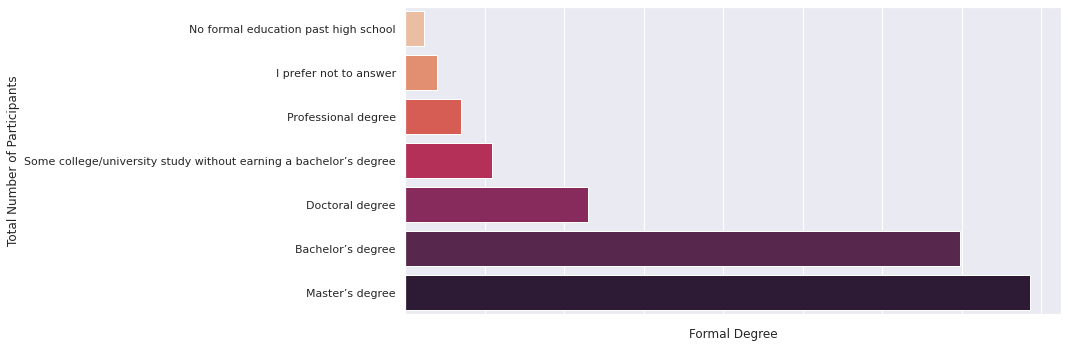

In [19]:
x=degree.index
y=degree.values

plt.figure(figsize=(15,5))
sns.set(font_scale=1)

ax=sns.barplot(y,x,palette="rocket_r")
ax.set_xticklabels(ax.get_xticklabels(),rotation=20, ha="right")

ax.set(xlabel='Formal Degree', ylabel='Total Number of Participants')

plt.tight_layout()
plt.show()

### 9)How much experence needs for most people to get perticular job?

Text(0.5, 8.959999999999994, 'Current Jobs')

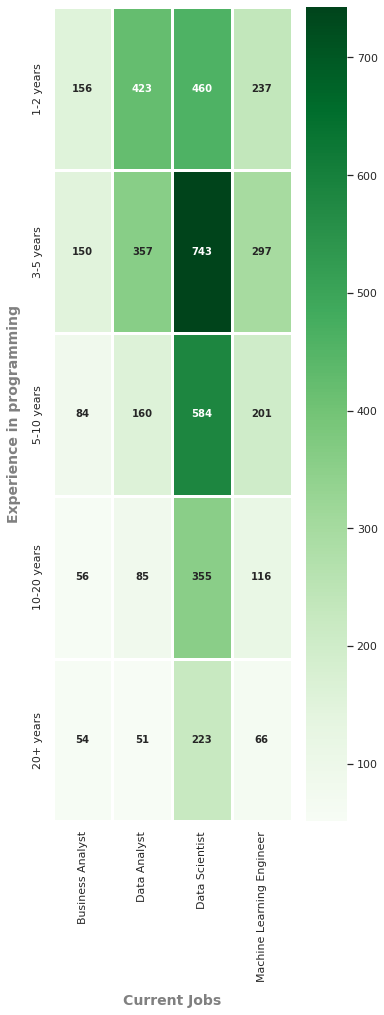

In [20]:
name=df.columns[5]
name2=df.columns[6]
jobs = df[(df[name] == "Data Scientist") |
                              (df[name] == "Machine Learning Engineer") |
                              (df[name] == "Data Analyst")|
                              (df[name] == "Business Analyst")]
jobs['count'] = 1
jobs_exp = pd.pivot_table(jobs, index=[name2], columns=[name], values='count', aggfunc='sum').reindex(['1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years'])

fig, ax = plt.subplots(figsize=(5,12))
fig.tight_layout()
sns.heatmap(jobs_exp, linewidths=2.5, annot=True, annot_kws={"size": 10, "fontweight": 'bold'}, cmap="Greens", fmt="d")
ax.set_ylabel('Experience in programming',fontsize=14, fontweight='bold', color='gray', labelpad=12)
ax.set_xlabel('Current Jobs',fontsize=14, fontweight='bold', color='gray', labelpad=12)

### 10)What is the proportionality of salary with Experience

In [21]:
salary = df.iloc[:,118].value_counts().astype(np.int64)
salary.index = [i.replace(',','') for i in salary.index]

salary.index = [i.replace('$','') for i in salary.index]

salary.index = [i.replace('> ','') for i in salary.index]

new_index = {}
for i in salary.index:
    mid_point = i.find('-')
    left_num = int(i[:(mid_point)])
    right_num = int(i[(mid_point+1):])
    new_index[i] = (left_num+right_num)/2

In [22]:
name1=df.columns[5]
name2=df.columns[6]
name3=df.columns[118]
job_salary=jobs[[name2,name1,name3]]
new_salary_list = list(new_index.values())
old_salary_index = df.iloc[:,118].value_counts().astype(np.int64)
old_salary_list = list(old_salary_index.index)
idx_map = dict(zip(old_salary_list, new_salary_list))
job_salary = job_salary.replace({name3: idx_map})
exp_order = ['I have never written code', '< 1 years', '1-2 years', '3-5 years','5-10 years', '10-20 years', '20+ years']
exp_integer = [0, 1, 1.5, 4, 7.5, 15, 20]
exp_dict= dict(zip(exp_order, exp_integer))
job_salary = job_salary.replace({name2: exp_dict})
job_salary.fillna(0, inplace=True)

Text(0.5, 0, 'Experience in coding')

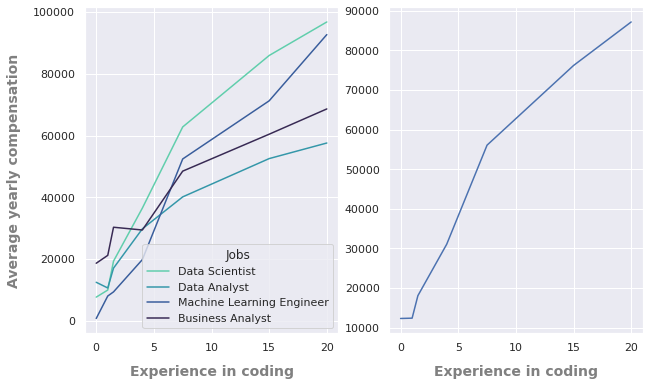

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
axs = axes.ravel()
palette = sns.color_palette("mako_r", 4)

sns.lineplot(data=job_salary, x=name2, y=name3, hue=name1, ci=None, palette=palette, ax=axs[0])
axs[0].legend().set_title('Jobs')
axs[0].set_xlabel('Experience in coding', fontsize=14, fontweight='bold', color='gray', labelpad=12)
axs[0].set_ylabel('Average yearly compensation', fontsize=14, fontweight='bold', color='gray', labelpad=12)

sns.lineplot(data=job_salary, x=name2, y=name3, ci=None, ax=axs[1])
axs[1].set_ylabel('')
axs[1].set_xlabel('Experience in coding', fontsize=14, fontweight='bold', color='gray', labelpad=12)